In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [4]:
Data=pd.read_csv("C:/Users/PARTHA/Desktop/Pricipal Component Analysis/Iris.csv")

In [5]:
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
Data.shape

(150, 5)

In [10]:
Features=Data.iloc[:,0:4]
Features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Features.var(axis=0)

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

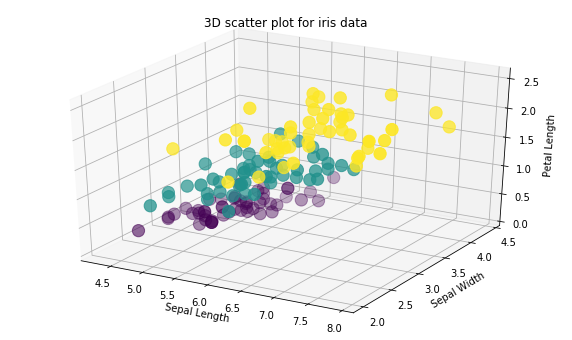

In [24]:
cm = plt.get_cmap("RdYlGn")

x = Data['SepalLengthCm']
y = Data['SepalWidthCm']
z = Data['PetalWidthCm']
col = Data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
shape=len(Data)

# 3D Plot
fig = plt.figure(figsize=(10,6))
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(x, y, z, s=shape, c=col, marker='o')                                                                                
ax3D.set_xlabel('Sepal Length')
ax3D.set_ylabel('Sepal Width')
ax3D.set_zlabel('Petal Length')
ax3D.set_title("3D scatter plot for iris data")
plt.show()

In [39]:
class ApplyPCA:
    
    def __init__(self):
        self.components=None
        
    
    def ApplyStandardization(self,x):
        scaler=StandardScaler()
        scaled_data=scaler.fit_transform(x)
        return scaled_data
    
    def Fit_PCA(self,x,components):
        self.components=components
        PCA_inst=PCA(n_components=components)
        projected_data=PCA_inst.fit_transform(x)
        return projected_data
    
    def VisualizePCA(self,x):
        plt.figure(figsize=(10,6))
        target=Data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
        #colors = {0:'red', 1:'blue',2:'green'}
        #label_color = [colors[l] for l in target]
        sns.scatterplot(x[:,0],x[:,1],hue=target,alpha=0.6)
        plt.xlabel('Component1')
        plt.ylabel('Component2')
        plt.title("Visulalizing principal components")
        plt.show()
        
    def Screeplot(self,x):
        plt.figure(figsize=(10,6))
        PCA_ist=PCA().fit(x)
        plt.plot(np.cumsum(PCA_ist.explained_variance_ratio_))
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
        plt.title("Scree Plot")
        plt.show()
        


In [40]:
pca=ApplyPCA()

In [42]:
scaled_data=pca.ApplyStandardization(Features)
scaled_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [36]:
proj_data=pca.Fit_PCA(scaled_data,2)

In [37]:
proj_data

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

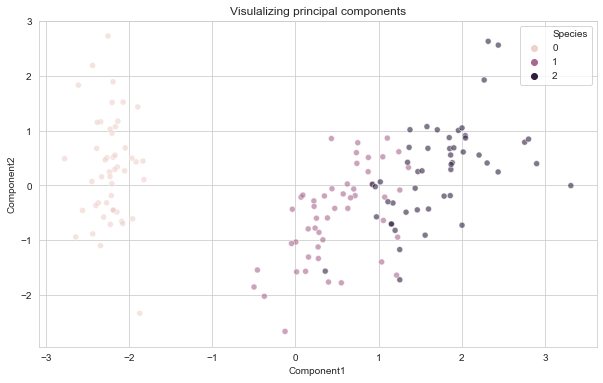

In [43]:
sns.set_style('whitegrid')
pca.VisualizePCA(proj_data)

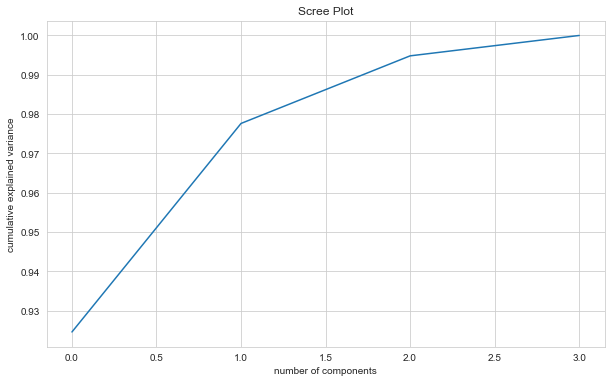

In [44]:
sns.set_style('whitegrid')
pca.Screeplot(Features)